# 2주차
## NumPy

In [1]:
import numpy as np

## Matplotlib

In [2]:
import matplotlib.pyplot as plt

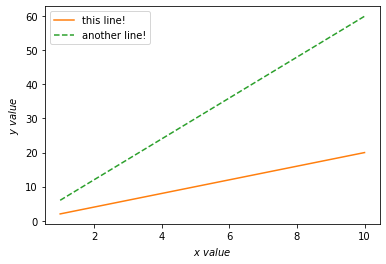

In [23]:
xvals = np.linspace(1,10,int(1e3))
yvals = np.linspace(2,20,int(1e3))
plt.plot(xvals, yvals, ls='-', color='C1', label="this line!")
plt.plot(xvals, 3*yvals, ls='--', color='C2', label="another line!")

plt.legend(loc=("best"))

# plt.xlim(1,10)
# plt.ylim(1,70)

plt.xlabel("$x ~value$")
plt.ylabel("$y ~value$")

plt.show()

xvals -> 그래프의 x좌표들  
yvlas -> 그래프의 y좌표들  
ls -> '-' : 실선, '--' : 점선  
color -> 그래프의 색 ex) 'C1', 'C2', 'C3', ...  
label -> label = Expression

# 3주차

## time

In [4]:
from time import time

In [6]:
start = time()
# run any function
end = time()
print(end - start)

0.0


## 1. Bisection Method

### Algorithm

The bisection method procedure is:

1. Choose a starting interval $[a_0,b_0]$ such that $f(a_0)f(b_0) < 0$.
2. Compute $f(m_0)$ where $m_0 = (a_0+b_0)/2$ is the midpoint.
3. Determine the next subinterval $[a_1,b_1]$:
    1. If $f(a_0)f(m_0) < 0$, then let $[a_1,b_1]$ be the next interval with $a_1=a_0$ and $b_1=m_0$.
    2. If $f(b_0)f(m_0) < 0$, then let $[a_1,b_1]$ be the next interval with $a_1=m_0$ and $b_1=b_0$.
4. Repeat (2) and (3) until the interval $[a_N,b_N]$ reaches some predetermined length.
5. Return the midpoint value $m_N=(a_N+b_N)/2$.

### Absolute Error

---

**Theorem**. Let $f(x)$ be a continuous function on $[a,b]$ such that $f(a)f(b) < 0$. After $N$ iterations of the biection method, let $x_N$ be the midpoint in the $N$th subinterval $[a_N,b_N]$

$$
x_N = \frac{a_N + b_N}{2}
$$

There exists an exact solution $x_{\mathrm{true}}$ of the equation $f(x)=0$ in the subinterval $[a_N,b_N]$ and the absolute error is

$$
\left| \ x_{\text{true}} - x_N \, \right| \leq \frac{b-a}{2^{N+1}}
$$

---

Note that we can rearrange the error bound to see the minimum number of iterations required to guarantee absolute error less than a prescribed $\epsilon$:

\begin{align}
\frac{b-a}{2^{N+1}} & < \epsilon \\\
\frac{b-a}{\epsilon} & < 2^{N+1} \\\
\ln \left( \frac{b-a}{\epsilon} \right) & < (N+1)\ln(2) \\\
\frac{\ln \left( \frac{b-a}{\epsilon} \right)}{\ln(2)} - 1 & < N
\end{align}

### Implementation

Write a function called `bisection` which takes 4 input parameters `f`, `a`, `b` and `N` and returns the approximation of a solution of $f(x)=0$ given by $N$ iterations of the bisection method. If $f(a_n)f(b_n) \geq 0$ at any point in the iteration (caused either by a bad initial interval or rounding error in computations), then print `"Bisection method fails."` and return `None`.

In [33]:
def bisection(f,a,b,N):
    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1, N+1):
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Bisection method fails.")
            return None
    return (a_n + b_n)/2

## Lambda Functions

function_name = lambda parameter: return_value

In [34]:
average = lambda x: sum(x)/len(x)

## 2. Secant Method

### Algorithm
1. $f(a)f(b)<0$인 두 점 $a,b$를 알고 있을 때, 두 점을 잇는 line을 그린다.
2. 그 라인의 $x$절편을 $m$으로 잡고 중간값 정리 사용 (Bisection Method와 유사)
3. 계속 반복한다.

### Secant Line Formula
$$y=\frac{f(b)-f(a)}{b-a}(x-a)+f(a)$$
$y=0$을 대입하면 $x$절편이 나온다.
$$ x= a-f(a) \frac{b-a}{f(b)-f(a)}$$

### Implementation

In [35]:
def secant(f,a,b,N):
    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1, N+1):
        m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Bisection method fails.")
            return None
    return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))

## 3. Newton's Method

Let $f(x)$ be a differentiable function. If $x_0$ is near a solution of $f(x)=0$ then we can approximate $f(x)$ by the tangent line at $x_0$ and compute the $x$-intercept of the tangent line. The equation of the tangent line at $x_0$ is

$$
y = f'(x_0)(x - x_0) + f(x_0)
$$

The $x$-intercept is the solution $x_1$ of the equation

$$
0 = f'(x_0)(x_1 - x_0) + f(x_0)
$$

and we solve for $x_1$

$$
x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}
$$

If we implement this procedure repeatedly, then we obtain a sequence given by the recursive formula

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

which (potentially) converges to a solution of the equation $f(x)=0$.

### Implementation

Let's write a function called `newton` which takes 5 input parameters `f`, `Df`, `x0`, `epsilon` and `max_iter` and returns an approximation of a solution of $f(x)=0$ by Newton's method. The function may terminate in 3 ways:

1. If `abs(f(xn)) < epsilon`, the algorithm has found an approximate solution and returns `xn`.
2. If `f'(xn) == 0`, the algorithm stops and returns `None`.
3. If the number of iterations exceed `max_iter`, the algorithm stops and returns `None`.

In [36]:
def newton(f,Df,x0,epsilon,max_iter):
    xn = x0
    for n in range(0, max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after', n, 'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None

# 4주차

## Riemann Sums

A left Riemann sum is when each $x_i^*=x_{i-1}$ is the left endpoint of the subinterval $[x_{i-1},x_i]$

A right Riemann sum is when each $x_i^*=x_{i}$ is the left endpoint of the subinterval $[x_{i-1},x_i]$

A midpoint Riemann sum is when each $x_i^*=(x_{i-1}+x_i)/2$ is the left endpoint of the subinterval $[x_{i-1},x_i]$

x = [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
x_left  = [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
x_mid   = [0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
x_right = [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


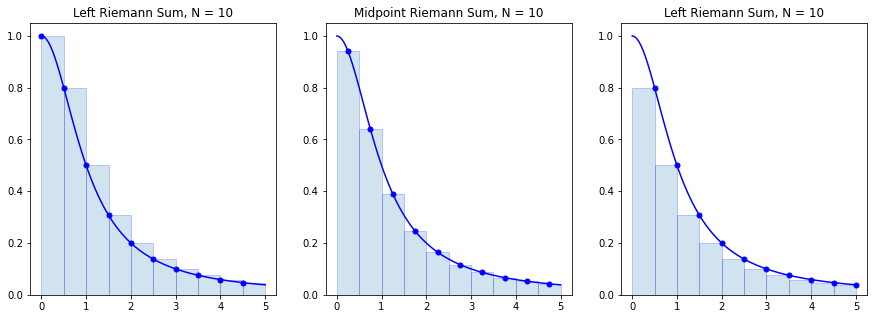

In [40]:
f = lambda x: 1/(1+x**2)
a = 0; b = 5; N = 10
n = 10 # Use n*N+1 points to plot the function smmothly

x = np.linspace(a,b,N+1)
y = f(x)
print("x =",x)
X = np.linspace(a,b,n*N+1)
Y = f(X)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(X,Y,'b')
x_left = x[:-1] # Left endpoints
print("x_left  =",x_left)
y_left = y[:-1]
plt.plot(x_left,y_left,'b.',markersize=10)
plt.bar(x_left,y_left,width=(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Left Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,2)
plt.plot(X,Y,'b')
x_mid = (x[:-1] + x[1:])/2 # Midpoints
print("x_mid   =",x_mid)
y_mid = f(x_mid)
plt.plot(x_mid,y_mid,'b.',markersize=10)
plt.bar(x_mid,y_mid,width=(b-a)/N,alpha=0.2,edgecolor='b')
plt.title('Midpoint Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,3)
plt.plot(X,Y,'b')
x_right = x[1:] # Right endpoints
print("x_right =",x_right)
y_right = y[1:]
plt.plot(x_right,y_right,'b.',markersize=10)
plt.bar(x_right,y_right,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Left Riemann Sum, N = {}'.format(N))

plt.show()

### Implementation

In [42]:
def riemann_sum(f,a,b,N,method='midpoint'):
    
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    
    if method == 'left':
        x_left = x[:-1]
        return np.sum(f(x_left)*dx)
    elif method == 'right':
        x_right = x[1:]
        return np.sum(f(x_right)*dx)
    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:])/2
        return np.sum(f(x_mid)*dx)
    else:
        raise ValueError("Type 'left', 'right' or 'midpoint'.")

## Trapezoid Rule
---

**Theorem.** Let $T_N(f)$ denote the trapezoid rule

$$
T_N(f) = \frac{\Delta x}{2} \sum_{i=1}^N (f(x_i) + f(x_{i-1}))
$$

where $\Delta x = (b-a)/N$ and $x_i = a + i \Delta x$. The error bound is

$$
E_N^T(f) = \left| \ \int_a^b f(x) \ dx - T_N(f) \ \right| \leq \frac{(b-a)^3}{12 N^2} K_2
$$

where $\left| \ f''(x) \, \right| \leq K_2$ for all $x \in [a,b]$.

---

In [43]:
def trapz(f,a,b,N=50):
    
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b-a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

# 5주차

## Simpson's Rule

### Definition

$$ S_N(f)=\frac{\Delta x}{3} \sum_{i=1}^{N/2}(f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})) $$

where $N$ is an even number of subintervals of $[a,b]$, $\Delta x = (b-a)/N$ and $x_i=a+i\Delta x$.

### Error Formula

$$ E_N^S(f)\le \frac{(b-a)^5}{180N^4}K_4 $$

where $ |f^{(4)}(x)|\le K_4 $ for all $ x \in [a,b] $.

In [44]:
def simps(f,a,b,N=50):
    
    if N%2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

## First Order Equations

### Linear Equations

$$ y'+p(t)y=q(t) $$  
For example, the equation  
$$ y'+y=\cos(t) $$  
$$ y(t) = Ce^{-t}+\frac{\cos(t)+\sin(t)}{2} $$

The constant $C$ is determined by the initial value $y(0)=C+1/2$. Plot the solution $y(t)$ over the interval $0 \le t \le 10$ for each initial value $y(0)=-3, -2,-1,0,1,2,3$.

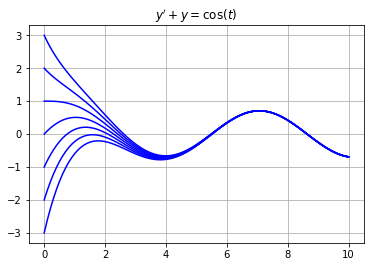

In [45]:
t = np.linspace(0,10,100)
for y0 in range(-3,4):
    C = y0 - 1/2
    y = C*np.exp(-t) + (np.cos(t) + np.sin(t))/2
    plt.plot(t,y,'b')
plt.title("$y'+y=\cos(t)$"), plt.grid(True)
plt.show()

## Separable Equations

$$ y'=f(t)g(y) $$

For example, the equation  
$$ y' = -2ty^2 $$  
$$ y(t) = \frac{1}{t^2+C} $$  
The constant $C$ is determined by the initial value $y(0)=1/C$. Plot the solution $y(t)$ over the interval $0 \le t \le 5$ for each initial value $y(0)=1,...,5$.

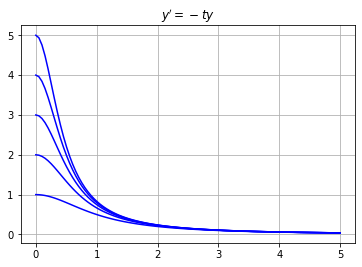

In [46]:
t = np.linspace(0,5,100)
for y0 in range(1,6):
    C = 1/y0
    y = 1/(t**2 + C)
    plt.plot(t,y,'b')
plt.title("$y'=-ty$"), plt.grid(True)
plt.show()

## Autonomous Equations

$$ y'=f(y) $$  
For example, the equation  
$$ y'=y(1-y) $$  
$$ y(t)=\frac{Ce^t}{1+Ce^t} $$

The constant $C$ is determined by the initial value $y(0)=C/(1+C)$ (except $y(t)=0$ when $y(0)=1$). Plot the solution $y(t)$ over the interval $0 \le t \le 2$ for each initial value 

$$y(0)=-0.1,0.0,0.5,1.0,1.5,2.0,3.0$$.

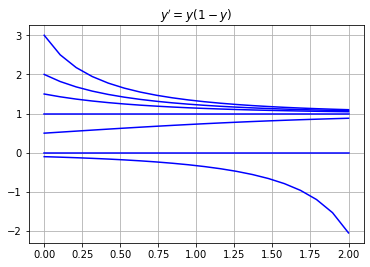

In [47]:
t = np.linspace(0,2,20)
for y0 in [-0.1,0.0,0.5,1.5,2,3]:
    C = y0/(1-y0)
    y = C*np.exp(t)/(1+C*np.exp(t))
    plt.plot(t,y,'b')
plt.plot([0,2],[1,1],'b') # Plot constant solution y(t) = 1
plt.title("$y'=y(1-y)$"), plt.grid(True)
plt.show()

## Euler's Method

$$ y'=f(t,y),~ y(t_0)=y_0 $$ 

1. Contruct the equation of the tangent line to the unknown function $y(t)$ at $t=t_0$:  
$$ y= y(t_0)+f(t_0,y_0)(t-t_0) $$  
    where $y'(t_0)=f(t_0,y_0)$ is the slope of $y(t)$ at $t=t_0$.    
    
2. Use the tangent line to approximate $y(t)$ at a small time step $t_1=t_0+h$:  
$$ y_1=y_0+f(t_0,y_0)(t_1-t_0) $$  
    where $y_1 \sim y(t_1)$  

3. Repeat!

The formula for Euler's method defines a recursive sequence:  

$$ y_{n+1} = y_n + f(t_n, y_n)(t_{n+1}-t_n),~y_0=y(t_0) $$  
where $y_n \sim y(t_n) $ for each $n$. If we choose equally spaced $t$ values then the formula becomes:  

$$ y_{n+1} = y_n + f(t_n, y_n)h,~y_0=y(t_0),~t_n=t_0+nh $$  
with time step $h=t_{n+1}-t_n$. If we implement $N$ iterations of Euler's method from $t_0$ to $t_f$ then the time step is  

$$ h=\frac{t_f-t_0}{N} $$

- $f$  is a function which represents the right side of the equation $y'=f(t,y)$
- $t$  is a 1D NumPy array
- $y0$  is an initial value $y(t_0)=y_0$ where $t_0$ is the value $t[0]$

### Implementation

In [32]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0, len(t)-1):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n+1] - t[n])
    return y

# 6주차

## Numerical Methods

### Setup

$$ y' = f(t,y),~y(t_0)=y_0 $$

A numerical method is an algorithm which approximates the solution $y(t)$.

$$ y_n \approx y(t_n) $$

All the numerical methods we consider below are examples of explicit Runge-Kutta methods which follow the same general procedure:
1. Given a point $(t_n,y_n)$, approximate slopes $k_1,...k_s$ nearby using $f(t,y)$.
2. Compute an average $\tilde{k}$ of the slopes $k_1,...k_s$
3. Compute the next value: $y_{n+1}=y_n+\tilde{k}h$.
4. Repeat!

## Euler's Method

$$ y(t+h) \approx y(t)+y'(t)h $$

$$ h=t_{n+1}-t_n $$
$$ k_1=f(t_n,y_n)$$
$$ y_{n+1}=y_n+k_1h$$

- $f$  is a function which represents the right side of the equation $y'=f(t,y)$
- $t$  is a 1D NumPy array
- $y0$  is an initial value $y(t_0)=y_0$ where $t_0$ is the value $t[0]$

In [48]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        y[n+1] = y[n] + k1*h
    return y

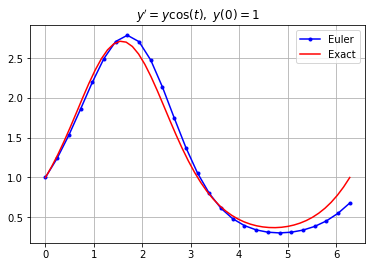

In [49]:
f = lambda t,y: y*np.cos(t)
y0 = 1; t0 = 0; tf = 2*np.pi;
h = 0.25; N = int((tf - t0)/h) + 1; # h가 줄어들수록 exact에 가까워진다.
t = np.linspace(t0,tf,N+1)

y = odeEuler(f,t,y0)

plt.plot(t,y,'b.-')
t_exact = np.linspace(t0,tf,50)
y_exact = np.exp(np.sin(t_exact))
plt.plot(t_exact, y_exact, 'r')

plt.grid(True), plt.title("$y'=y \cos(t),~y(0)=1$")
plt.legend(["Euler","Exact"])
plt.show()

## Heun's Method

$$ y(t+h)\approx y(t)+y'(t)h+ \frac{y''(t)}{2}h^2 $$

$$ y''(t) \approx \frac{y'(t+h)-y'(t)}{h} $$

$$ y(t+h) \approx y(t)+\frac{y'(t+h)+y'(t)}{2}h $$

User Euler's method $y(t+h) \approx y(t)+y'(t)h$ to approximate:

$$ y'(t+h)=f(t+h, y(t+h)) \approx f(t+h,y(t)+y'(t)h) $$

---

Heun's method is given by the 2-stage recursive formula:

$$ h = t_{n+1}-t_n $$  
$$ k_1 = f(t_n,y_n) $$  
$$ k_2 = f(t_n+h,y_n+k_1h) $$  
$$ y_{n+1}=y_n+\frac{k_1+k_2}{2}h $$  
---
- $f$  is a function which represents the right side of the equation $y'=f(t,y)$
- $t$  is a 1D NumPy array
- $y0$  is an initial value $y(t_0)=y_0$ where $t_0$ is the value $t[0]$

### Implementation

In [50]:
def odeHeun(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n+1],y[n] + k1*h)
        y[n+1] = y[n] + (k1 + k2)/2*h
    return y

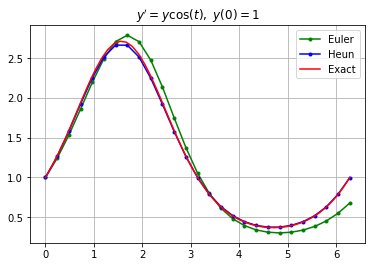

In [51]:
f = lambda t,y: y*np.cos(t)
y0 = 1; t0 = 0; tf = 2*np.pi;
h = 0.25; N = int((tf - t0)/h) + 1; # h가 줄어들수록 exact에 가까워진다.
t = np.linspace(t0,tf,N+1)

y_euler = odeEuler(f,t,y0); plt.plot(t,y_euler,'g.-');
y_heun = odeHeun(f,t,y0); plt.plot(t,y_heun,'b.-');

t_exact = np.linspace(t0,tf,50)
y_exact = np.exp(np.sin(t_exact))
plt.plot(t_exact, y_exact, 'r')

plt.grid(True), plt.title("$y'=y \cos(t),~y(0)=1$")
plt.legend(["Euler","Heun","Exact"])
plt.show()

## RK4 Method

Let an IVP be specified as follows:

$$\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0.$$

Then, the RK4 method is 
$$
\begin{align}
y_{n+1} &= y_n + \frac{1}{6}\left(k_1 + 2k_2 + 2k_3 + k_4 \right)h,\\
t_{n+1} &= t_n + h \\
\end{align}
$$
where
$$
\begin{align}
 k_1 &= \ f(t_n, y_n), \\
 k_2 &= \ f\!\left(t_n + \frac{h}{2}, y_n + h\frac{k_1}{2}\right), \\ 
 k_3 &= \ f\!\left(t_n + \frac{h}{2}, y_n + h\frac{k_2}{2}\right), \\
 k_4 &= \ f\!\left(t_n + h, y_n + hk_3\right).
 \end{align}
$$


Here $y_{n+1}$ is the RK4 approximation of $y(t_{n+1})$, and the next value ($y_{n+1}$) is determined by the present value ($y_n$) plus the weighted average of four increments, where each increment is the product of the size of the interval, ''h'', and an estimated slope specified by function ''f'' on the right-hand side of the differential equation.

In averaging the four slopes, greater weight is given to the slopes at the midpoint. If $f$ is independent of $y$, so that the differential equation is equivalent to a simple integral, then RK4 is Simpson's rule.

### Problem

Consider $y' = y- t^2 + 1$ with $y(0) = 0.5$. The exact solution is $y = t^2 + 2t + 1 -\frac{1}{2} e^t$.

1. Write a code for the RK4 to find y(1).

In [3]:
def odeRK4(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0, len(t)-1):
        h = t[n+1]-t[n]
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h/2, y[n] + h*k1/2)
        k3 = f(t[n] + h/2, y[n] + h*k2/2)
        k4 = f(t[n] + h, y[n] + h*k3)
        y[n+1] = y[n] + (k1 + 2*k2 + 2*k3 + k4)/6*h
    return y

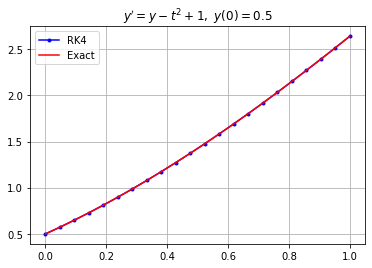

Exact solution  : 2.6408590857704777
Approx solution : 2.6408589620246614


In [4]:
f = lambda t,y: y-t**2+1
exactSolutionFunction = lambda t: t**2 + 2*t + 1 - np.e**t/2

y0 = 0.5; t0 = 0; tf = 1;
h = 0.05; N = int((tf-t0)/h) + 1;
t = np.linspace(t0,tf,N+1)

y_RK4 = odeRK4(f,t,y0)

plt.plot(t,y_RK4,'b.-')

t_exact = np.linspace(t0,tf,100)
y_exact = exactSolutionFunction(t_exact)
plt.plot(t_exact, y_exact, 'r')

plt.grid(True), plt.title("$y'=y-t^2+1,~y(0)=0.5$")
plt.legend(["RK4","Exact"])
plt.show()

print("Exact solution  :",exactSolutionFunction(1))
print("Approx solution :", y_RK4[-1])

2. Let's verify the order of Heun's method experimentally by plotting the "local truncation error" for RK4 applied to the underlying equation. Use loglog plot to see the convergence.

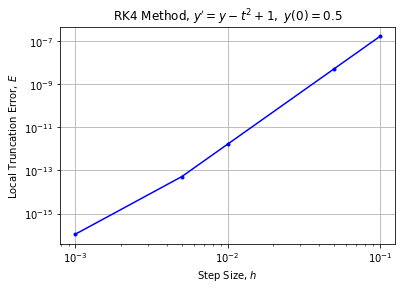

In [5]:
h = [0.1,0.05,0.01,0.005,0.001]
E = np.zeros(len(h))
for n in range(0,len(h)):
    y = odeRK4(f,[0,h[n]],y0)
    y1 = y[1]
    y1_exact = exactSolutionFunction(h[n])
    E[n] = np.abs(y1_exact - y1)
    
plt.loglog(h,E,'b.-'), plt.grid(True)
plt.title("RK4 Method, $y'=y-t^2+1,~y(0)=0.5$")
plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.show()

In [6]:
for j in range(len(h)-1):
    print("order+1 :",(np.log(E[j+1]) - np.log(E[j])) / (np.log(h[j+1]) - np.log(h[j])))

order+1 : 4.996919291841246
order+1 : 4.998943208367904
order+1 : 4.999807730386747
order+1 : 3.821584368634736


### Error Analysis

### Order of Accuracy
The (local) truncation error is
$$ E(h)=|y(t_1)-y_1|=\frac{|y^{(p+1)}(c)|}{(p+1)!}h^{p+1} $$

$$ E(h) \le Ch^{p+1}$$

$$ E(h) \approx Ch^{p+1} $$

$$ \log(E(h)) \approx (p+1)\log(h) + \log(C) $$

1. Apply the numerical method to the equation $y'=y,~y(0)=1$ for different steps size $h_1$ and $h_2$.
2. Compute the local truncation errors $E(h_1)$ and $E(h_2)$ using the exact solution $y(t)=e^t$.
3. Compute the slope of the loglog plot:

$$ p+1 \approx \frac{\log(E(h_2)) - \log(E(h_1))}{\log(h_2) - \log(h_1)} $$

### Examples 1: Euler's Method is Order 1
$$ y(t_1)=y(t_0) + y'(t_0)(t_1-t_0)+ \frac{y''(c)}{2}(t_1-t_0)^2 $$  
for some $ c \in [t_0,t_1]\ $. Therefore, if $|y''(t)|\le K_2$ for all $t \in [t_0,t_1] $, then  
$$ E(h) = |\frac{y''(c)}{2}(t_1-t_0)^2| \le \frac{K_2h^2}{2} $$

In [ ]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        y[n+1] = y[n] + k1*h
    return y

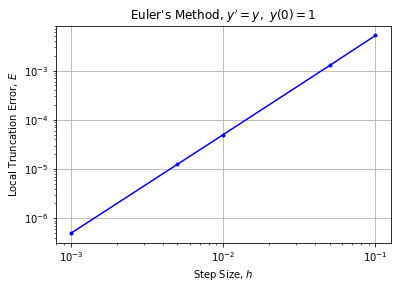

2.024347026640165
2.008325982940494
2.0024074989032097
2.0008288607077844


In [52]:
f = lambda t,y: y
y0 = 1;
h = [0.1,0.05,0.01,0.005,0.001]
E = np.zeros(len(h))
for n in range(0,len(h)):
    y = odeEuler(f,[0,h[n]],y0)
    y1 = y[1]
    y1_exact = np.exp(h[n])
    E[n] = np.abs(y1_exact - y1)
    
plt.loglog(h,E,'b.-'), plt.grid(True)
plt.title("Euler's Method, $y'=y,~y(0)=1$")
plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.show()

for j in range(len(h)-1):
    print((np.log(E[j+1]) - np.log(E[j])) / (np.log(h[j+1]) - np.log(h[j])))

### Example 2: Heun's Method is Order 2

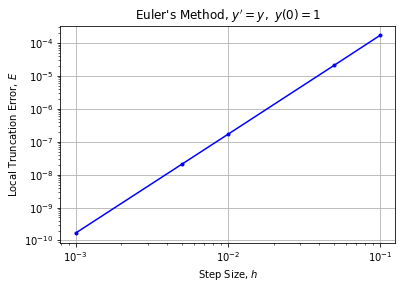

3.0182378826305905
3.006241389698562
3.0018054120486792
3.000621298955094


In [53]:
f = lambda t,y: y
y0 = 1;
h = [0.1,0.05,0.01,0.005,0.001]
E = np.zeros(len(h))
for n in range(0,len(h)):
    y = odeHeun(f,[0,h[n]],y0)
    y1 = y[1]
    y1_exact = np.exp(h[n])
    E[n] = np.abs(y1_exact - y1)
    
plt.loglog(h,E,'b.-'), plt.grid(True)
plt.title("Euler's Method, $y'=y,~y(0)=1$")
plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.show()

for j in range(len(h)-1):
    print((np.log(E[j+1]) - np.log(E[j])) / (np.log(h[j+1]) - np.log(h[j])))

# 7주차

## Linear Algebra with SciPy

In [10]:
import scipy.linalg as la

### Determiant
We can find the determinant using the function `scipy.linalg.det` or `la.det` :

## Polynomial Interpolation

### Formulation
Suppose we have $n+1$ points in the $xy$-plane
$$ (x_0,y_0),(x_1,y_1),...,(x_n,y_n) $$

$$ p(x) = a_0+a_1x+a_2x^2+...+a_nx^n $$

### Example : Simple Parabola
$(0,6),(3,1)$ and $(8,2)$

In [60]:
x = np.array([0,3,8])
y = np.array([6,1,2])

X = np.column_stack([x**k for k in range(0,3)])

a = la.solve(X, y)
print(a)

[ 6.         -2.36666667  0.23333333]


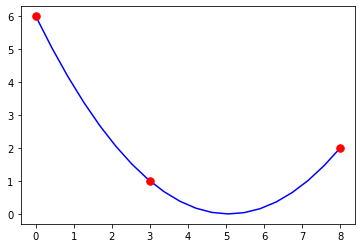

In [65]:
xs = np.linspace(0,8,20)
ys = sum(a[k]*xs**k for k in range(0,3))

plt.plot(xs,ys,'b')
plt.plot(x,y,'r.',ms=15)
plt.show()

### Fake Noisy Linear Data

In [71]:
noise = 0.1*np.random.randn(10)
print(noise)

[-0.01882727  0.1429211  -0.08508423 -0.02606843  0.11030556  0.06785982
 -0.02494128  0.0435908  -0.10240923  0.16310626]


## Polynomial Regression

### Formulation

The same idea works for fitting a degree $d$ polynomial model

$$
y = a_0 + a_1x + a_2x^2 + \cdots + a_dx^d
$$

to a set of $n+1$ data points

$$
(x_0,y_0), (x_1,y_1), \dots , (x_n,y_n)
$$

We form the matrices as before but now the Vandermonde matrix $X$ has $d+1$ columns

$$
X =
\begin{bmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^d \\\
1 & x_1 & x_1^2 & \cdots & x_1^d \\\
 & \vdots & & & \vdots \\\
1 & x_n & x_n^2 & \cdots & x_n^d
\end{bmatrix}
\ , \ \
\mathbf{y} =
\begin{bmatrix}
y_0 \\\
y_1 \\\
\vdots \\\
y_n
\end{bmatrix}
\ , \ \
\mathbf{a} =
\begin{bmatrix}
a_0 \\\
a_1 \\\
a_2 \\\
\vdots \\\
a_d
\end{bmatrix}
$$

The coefficients $\mathbf{a} = [a_0,a_1,a_2,\dots,a_d]^T$ which minimize the sum of squared errors $SSE$ is the unique solution of the linear system

$$
\left( X^T X \right) \mathbf{a} = \left( X^T \right) \mathbf{y}
$$

---
Let's build some fake data using a quadratic model $y = a_0 + a_1x + a_2x^2 + a_3x^3 + \epsilon$ and use linear regression to retrieve the coefficients $a_0$, $a_1$ and $a_2$.

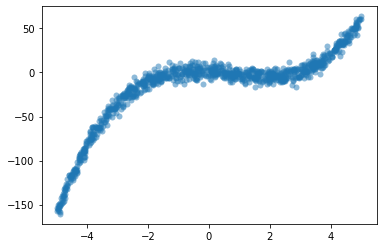

In [12]:
a0 = 1; a1 = -3; a2 = -2; a3 = 1;
N = 1000
x = 10*np.random.rand(N) - 5 # Random numbers in the interval (-5,5)
noise = 5*np.random.randn(N)
y = a0 + a1*x + a2*x**2 + a3*x**3 + noise
plt.scatter(x,y,alpha=0.5,lw=0);
plt.show()

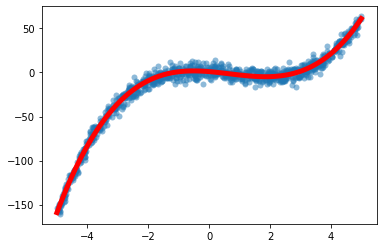

[ 0.95836072 -2.83234192 -1.99739504  0.99375017]


In [13]:
X = np.column_stack([x**k for k in range(0,4)])
a = la.solve(X.T @ X, X.T @ y)

x_approx = np.linspace(-5,5,100)
y_approx = sum(a[k]*x_approx**k for k in range(0,4))

plt.scatter(x,y,alpha=0.5,lw=0)
plt.plot(x_approx, y_approx, 'r', lw=5)
plt.show()

print(a)